<div style="text-align: center">
<b><font size=6>ChEn 3603 Homework 2 Problem 4
    </font></b>
</div>

First, let's load the data from the csv file:

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import csv

data = []

with open( 'data.csv' ) as csvfile:
    rows = csv.reader( csvfile )
    
    spnames = next(rows)
    spnames.pop(0)  # remove the first (blank) entry

    fluxes = next(rows)
    fluxes.pop(0)   # remove the first entry (title)

    next(rows)
    next(rows)
    for row in rows:
        data.append(row)


# convert data to numpy arrays
fluxes = np.asarray(fluxes,dtype=float)
data = np.asarray(data,dtype=float)

# # load the data.  Column 0: z, Column 1: Acetone, Column 2: Methanol, Column 3: Air
# data = np.genfromtxt('data.csv',delimiter=',',skip_header=4)
z = data[:,0]
x = data[:,1:]
# print(x[1])


[0.31678 0.52287 0.16035]


# Part 1 - composition profiles

___show equations___

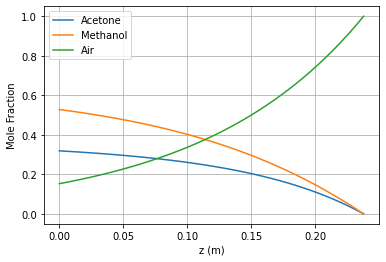

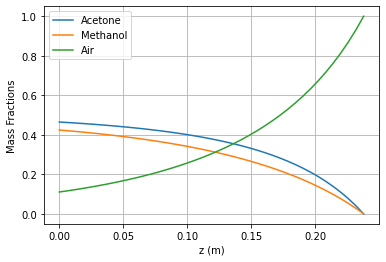

In [23]:
%matplotlib inline
nz = len(z)        # number of data points
ns = len(spnames)  # number of species
# print(ns)

# R = 8.31446    # gas constant (J/mol/K)
R = 8.2057338e-5 # gas constant (m^3 atm/mol/K)
P = 1            # pressure, atm
T = 298          # temperature, K

# c = ?  # ideal gas molar concentration mol/m^3

totFlux = np.sum(fluxes)  # total (mixture) molar flux (mol/(m^2 s))

## Plot mole fraction profiles
plt.plot( z, x ) 
plt.xlabel('z (m)') 
plt.ylabel('Mole Fraction') 
plt.legend(['Acetone','Methanol','Air'])

plt.grid()
plt.show()

## Mass fractions

# set the mixture molecular weight (g/mol) at each point.
Macetone  = 58.08        # C3H6O molecular weight (g/mol)
Mmethanol = 32.04        # CH3OH molecular weight (g/mol)
Mair      = 32*.21+.79*28        # 0.21 O2 + 0.79 N2
Mi = [ Macetone, Mmethanol, Mair ]
MixtureMW = np.zeros(nz)
for i in range(0,ns):
  MixtureMW += x[:,i]*Mi[i]

    
w = np.zeros_like(x)
for i in range(0,ns):
  w[:,i] = x[:,i]*Mi[i] / MixtureMW


plt.plot( z, w )
plt.xlabel('z (m)') 
plt.ylabel('Mass Fractions') 
plt.legend(['Acetone','Methanol','Air'])
plt.grid()
plt.show()

# Part 2 - species velocities

___show work on how you will calculate this___

In [ ]:
## Plot the species velocities
vi = np.zeros((nz,ns))
for i in range(0,ns):
  vi[?,?] = fluxes[?] / ( x[?,?] * c )

plt.plot( z[?], vi[?,?] )
plt.xlabel('z (m)') 
plt.ylabel('Species Velocities (m/s)') 
plt.legend(?)
plt.grid()
plt.show()

___comments on your observations___

# Part 3 - mixture velocities

___show equations you use___

In [ ]:
##  Mixture velocities
v  = np.sum( ?, ? )  # mass averaged velocity
vm = np.sum( ?, ? )  # molar averaged velocity

plt.plot( z, v  )
plt.plot( z, vm )
plt.xlabel('z (m)') 
plt.ylabel('Velocity (m/s)') 
plt.legend(('Mass-Averaged','Molar-Averaged'))
plt.grid()
plt.show()

___discussion___

# Part 4 - Species Diffusive and Convective Fluxes

___formulation/equations___

In [ ]:
## Species diffusive fluxes
J = np.zeros((nz,ns))
convFlux = np.zeros_like(J)

for i in range(0,ns):
  J[?,?] = fluxes[?] - x[?,?] * ?
  convFlux[?,?] = x[?,?] * ?


plt.plot( z, J )
plt.xlabel('z (m)') 
plt.ylabel(r'Diffusive Flux $\left(\frac{mol}{m^2 s}\right)$') 
plt.legend(spnames)
plt.grid()
plt.show()

plt.plot( z, convFlux )
plt.xlabel('z (m)') 
plt.ylabel(r'Convective Flux $\left(\frac{mol}{m^2 s}\right)$') 
plt.legend(spnames)
plt.grid()
plt.show()

___observations___